In [134]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# controls
create_model = 1
show_some_spks = 1
make_some_predictions = 1
scale_dat = 1

# params
nrows_to_show = 8
ncols_to_show = 10
model_name = 'spks.model'

# load input variables
XX = np.load('X.npy')
yy = np.load('y.npy')
print(XX.shape)
n_rows = XX.shape[0]
n_cols = XX.shape[1]

(1430, 100)


In [135]:
# split data set into training and test data
x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=None)
# x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.1, random_state=None)

if scale_dat:
    x_train = x_train/100
    x_test = x_test/100

print(f'\nx_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}\n')
print(f'x_train\n{x_train}\n')
print(f'y_train\n{y_train}')


x_train shape = (1001, 100)
x_test shape = (429, 100)

x_train
[[ 1.40785432e-03  1.06727978e-03  1.02134331e-03 ... -2.40858922e-03
  -1.90566518e-03 -1.32805257e-03]
 [ 2.46160493e-03  2.18861132e-03  1.98015910e-03 ...  5.58785006e-04
   7.06916437e-04  7.87911842e-04]
 [ 3.63707793e-03  3.06749037e-03  2.47314109e-03 ... -3.81364755e-05
   2.80550738e-04  5.34249741e-04]
 ...
 [ 2.04191626e-03  2.05389970e-03  2.12340993e-03 ... -3.33814178e-05
  -4.67073351e-04 -8.78820665e-04]
 [ 2.69538491e-03  2.33144864e-03  1.91049961e-03 ... -2.07936423e-04
  -4.07061334e-05  1.43186228e-04]
 [ 1.44864181e-03  1.04790655e-03  8.39983974e-04 ...  3.99125860e-05
  -3.71471368e-05 -3.09803875e-04]]

y_train
[0 0 0 ... 1 0 0]


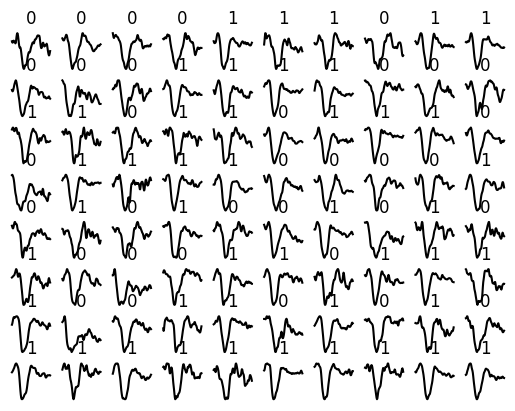

In [136]:
# show some of the training data
if show_some_spks:
    plt.figure()
    for index in range(nrows_to_show*ncols_to_show):
        this_spk = x_train[index]
        this_direction = int(y_train[index])
        #plot
        plt.subplot(nrows_to_show, ncols_to_show, index+1)
        plt.plot(this_spk, 'k')        
        plt.title(this_direction)
        plt.axis('off')
    plt.show()
    plt.close()

In [137]:
# Create model
if create_model:
    print('1) Generating model...')
    model = tf.keras.models.Sequential()
    # Add input layer
    model.add(tf.keras.layers.InputLayer(input_shape=(n_cols, ), name='input_layer'))
    # Add 2 hidden layers
    model.add(tf.keras.layers.Dense(units=n_cols, activation=tf.nn.relu))  # 1st hidden layer with "dense" connections to input layer
    model.add(tf.keras.layers.Dense(units=n_cols, activation=tf.nn.relu))  # 2nd hidden layer with "dense" connections to input layer
    # Add output layer
    model.add(tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)) # output laayer w/ 2 neurons that are scaled so their sum adds up to 1
    
    # Compile model
    print('\n2) Compiling model...')
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    print('\n3) Training model...')
    model.fit(x_train, y_train, epochs=3)

    # Evaluate model
    print('\n4) Evaluating model...')
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'\nloss = {loss}')
    print(f'accuracy = {accuracy}')

    # Save model    
    print(f'Saving model..."{model_name}"')
    model.save(model_name, save_format="h5")
else:
    print(f'\nLoading model..."{model_name}"')
    model = tf.keras.models.load_model(model_name)

# Check model architecture
model.summary()


1) Generating model...

2) Compiling model...

3) Training model...
Epoch 1/3
32/32 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.5495
Epoch 2/3
32/32 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5564
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.5874

4) Evaluating model...
14/14 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6503

loss = 0.641516923904419
accuracy = 0.6503496766090393
Saving model..."spks.model"
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 100)               10100     
                                                                 
 dense_68 (Dense)          

1/1 [==============================] - 0s 15ms/step


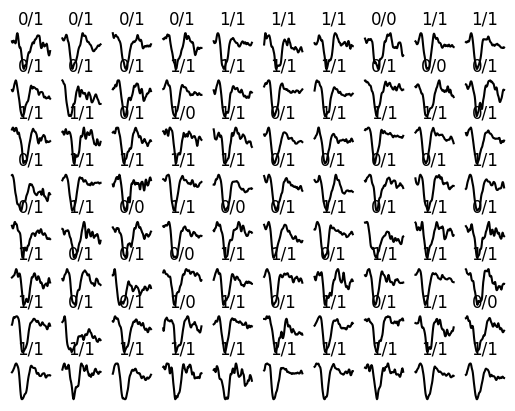

In [138]:
# plot spks showing true and predicted directions
if make_some_predictions:
    plt.figure()
    for index in range(nrows_to_show*ncols_to_show): 
        this_spk = x_train[index]        
        this_direction = int(y_train[index])
        guesses = model.predict(np.array([this_spk]))
        best_guess = int(np.argmax(guesses))
        # plot
        plt.subplot(nrows_to_show, ncols_to_show, index+1)
        plt.plot(this_spk, 'k')        
        plt.title(f'{this_direction}/{best_guess}')
        plt.axis('off')
    plt.show()
    plt.close()

In [139]:
# Make predictions on test data
xxs = x_test
yys = y_test
y_pred = model.predict(xxs)
label_pred = np.argmax(y_pred, axis=1)

# generate a confusion matrix
cm = confusion_matrix(yys, label_pred)
print(f'\nConfusion matrix:\n{cm}')

14/14 [==============================] - 0s 913us/step

Confusion matrix:
[[ 52 144]
 [  6 227]]


In [149]:
num_misclassified = cm[0,1] + cm[1,0]
print(f"Result = {num_misclassified} misclassified spikes out of {x_test.shape[0]} total.")

Result = 150 misclassified spikes out of 429 total.
